In [2]:
import pandas as pd
import numpy as np
from os import path

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

## Analisis Preliminar

In [3]:
df_train = pd.read_csv('./data/Entrenamieto_ECI_2020.csv')


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null object
Territory                             16947 non-null object
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null object
Account_Created_Date                  16947 non-null object
Source                                16947 non-null object
Billing_Country                       16947 non-null object
Account_Name                          16947 non-null object
Opportunity_Name                      16947 non-null object
Opportunity_ID                        16947 non-null int6

In [5]:
df_index = df_train.index
df_columns = df_train.columns
df_data = df_train.values

In [6]:
df_index

RangeIndex(start=0, stop=16947, step=1)

In [7]:
df_columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [8]:
df_data

array([[27761, 'EMEA', 'None', ..., 5272800.0, 'Closed Lost',
        'Prod_Category_A_None'],
       [27760, 'EMEA', 'None', ..., 48230.0, 'Closed Won',
        'Prod_Category_A_None'],
       [27446, 'Americas', 'NW America', ..., 83865.6, 'Closed Won',
        'Prod_Category_A_None'],
       ...,
       [8792, 'EMEA', 'Austria', ..., 299715.0, 'Closed Won',
        'Prod_Category_A_None'],
       [28561, 'Americas', 'NE America', ..., 0.0, 'Closed Lost',
        'Prod_Category_A_None'],
       [28318, 'Americas', 'NE America', ..., 0.0, 'Closed Lost',
        'Prod_Category_A_None']], dtype=object)

In [9]:
#tipo asociados a cada columna

In [10]:
df_train.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
Bureaucratic_Code_0_Approval            int64
Bureaucratic_Code_0_Approved            int64
Submitted_for_Approval                  int64
Bureaucratic_Code                      object
Account_Created_Date                   object
Source                                 object
Billing_Country                        object
Account_Name                           object
Opportunity_Name                       object
Opportunity_ID                          int64
Sales_Contract_No                      object
Account_Owner                          object
Opportunity_Owner                      object
Account_Type                           object
Opportunity_Type                       object
Quote_Type                             object
Delivery_Terms                    

In [11]:
df_train.dtypes.value_counts()

object     39
int64       9
float64     4
dtype: int64

In [12]:
df_train.size

881244

In [13]:
df_train.shape

(16947, 52)

In [14]:
df_train.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.0,16947.000000,13738.000000,13738.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,0.0,5335.940225,7.012128,0.432554,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,0.393893,0.492979,0.499413,0.466055,0.0,3324.723809,18.858359,0.758659,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,0.0,2448.500000,0.360000,0.373260,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,0.0,5306.000000,0.400000,0.412850,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,0.0,7698.000000,0.505000,0.476490,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,0.0,12803.000000,80.000000,67.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


In [15]:
print(len(df_train))

16947


In [16]:
df_train.dropna(inplace=True)

In [17]:
print(len(df_train))

13684


In [18]:
df_train

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.00,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.00,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.60,USD,83865.60,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.50,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.50,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,28,USD,14838277.50,USD,14838277.50,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2017,NaT,7,USD,2659494.60,USD,2659494.60,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,50688.00,USD,50688.00,Closed Won,Prod_Category_A_None
12,24358,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,304200.00,JPY,470400.00,Closed Lost,Prod_Category_A_None
17,24425,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,385320.00,JPY,559320.00,Closed Lost,Prod_Category_A_None


# Analisis de nulos

In [19]:
def valoresNulos1(columna):
    
    suma_null = columna.isnull().sum()
    total = columna.isnull().count()
    porcentaje_nulos = round(100* suma_null / total,2)
    #print (columna.name.ljust(30)  ,'{:6d}'.format(total) ,'{:19d}'.format(suma_null)  , '{:9.2f}'.format(porcentaje_nulos)+"%")
    return columna.name,total,suma_null,porcentaje_nulos

In [20]:
row=[]
for col1 in df_train.columns:
        row.append(valoresNulos1(df_train[col1]))

In [21]:
dfNulos = pd.DataFrame(row,columns=["Columna", "Total", "Cantidad Nulos", "%Nulos"]) 
dfNulos

,Columna,Total,Cantidad Nulos,%Nulos
0,ID,13684,0,0.0
1,Region,13684,0,0.0
2,Territory,13684,0,0.0
3,"Pricing, Delivery_Terms_Quote_Appr",13684,0,0.0
4,"Pricing, Delivery_Terms_Approved",13684,0,0.0
5,Bureaucratic_Code_0_Approval,13684,0,0.0
6,Bureaucratic_Code_0_Approved,13684,0,0.0
7,Submitted_for_Approval,13684,0,0.0
8,Bureaucratic_Code,13684,0,0.0
9,Account_Created_Date,13684,0,0.0


No se observan campos vacios en el set de datos, sin embargo veremos campos del estilo None en Territory o Nat Actual_Delivery_Date

# Analisis de Regiones y Territorios

## Regiones

In [22]:
df_train.Region.unique()

array(['EMEA', 'Americas', 'Japan', 'APAC', 'Middle East'], dtype=object)

In [248]:
grouped_Region = df_train['Region'].value_counts().to_frame()
grouped_Region = grouped_Region.rename(columns={"Region": "total"})

grouped_Region

,total
EMEA,4656
Americas,3466
APAC,3235
Japan,2143
Middle East,184


In [46]:
grouped_Region.reset_index()

,index,total
0,EMEA,4656
1,Americas,3466
2,APAC,3235
3,Japan,2143
4,Middle East,184


In [59]:
grouped_Region_top5 = grouped_Region['total'].nlargest(5)
grouped_Region_top5

EMEA           4656
Americas       3466
APAC           3235
Japan          2143
Middle East     184
Name: total, dtype: int64

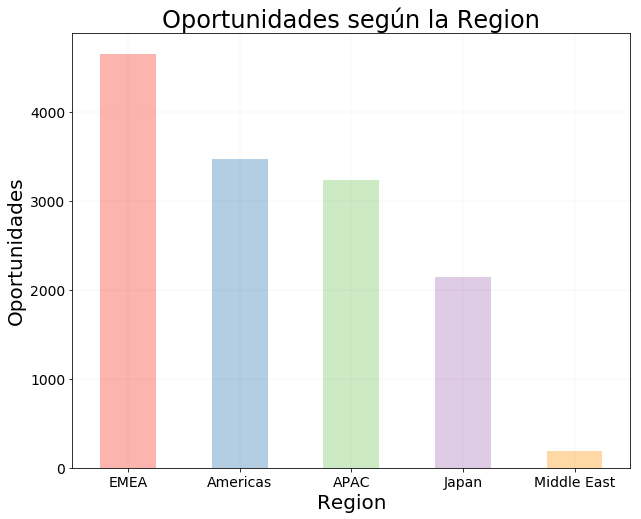

In [65]:

paired_colors = plt.cm.Pastel1(range(len(grouped_Region_top5)))
grouped_Region_top5.plot(kind='bar', rot=0, figsize=(10,8), color=paired_colors, fontsize=14, label='index')
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.3)
plt.title('Oportunidades según la Region', fontsize=24);
plt.xlabel('Region', fontsize=20);

plt.ylabel('Oportunidades', fontsize=20);

## Territorios

In [124]:
df_train.Territory.unique()

array(['None', 'NW America', 'India', 'Italy', 'Germany',
       'United Kingdom', 'UAE (Dubai)', 'Greece', 'Switzerland',
       'Austria', 'NE America', 'Belgium', 'Japan', 'Tunisia',
       'SE America', 'France', 'Spain', 'Singapore', 'Philippines',
       'SW America', 'Denmark', 'Central America', 'Poland', 'Norway',
       'Thailand', 'Portugal', 'South Korea', 'Australia', 'Netherlands',
       'Kuwait', 'Cambodia', 'Indonesia', 'China (PRC)', 'KSA', 'Ireland',
       'Jordan', 'Cyprus', 'Morocco', 'Turkey', 'Sweden', 'Monaco',
       'Kazakhstan', 'Romania', 'Hungary', 'Taiwan', 'South America',
       'South East Asia', 'Macedonia', 'Ukraine', 'Czech Republic',
       'Belarus', 'Solomon Islands', 'Vietnam', 'Saudi Arabia',
       'Bosnia & Herzegovina', 'Kosovo', 'Luxembourg', 'Bulgaria',
       'UAE (Others)', 'Armenia', 'Croatia', 'Malaysia', 'Georgia',
       'Estonia', 'Pakistan', 'Canada', 'Central US', 'Carribean',
       'Malta', 'New Zealand', 'Albania', 'Oman', 'Bur

In [203]:
#df_train['Territory_unified'] = df_train.Territory
df_train.loc[:,'Territory_unified'] = df_train['Territory']

In [204]:
df_train['Territory_unified'].replace(to_replace =["SE America", "SW America", "NE America", "NW America","Central US"],  
                            value ="United States",inplace=True)

Japon se encuentra como Region independiente, de ese analisis se puede deducir que los casos donde Territory sea None y su region Japon se puede completar para ese territorio

In [263]:
df_train[(df_train.Territory_unified=='None' )&(df_train.Region=='Japan')]['Territory_unified']\
            .replace(to_replace ="None",value ="Japan",inplace=True)


In [281]:
df_train.loc[(df_train.Territory_unified=='None' )&(df_train.Region=='Japan'),'Territory_unified'] = 'Japan'

In [283]:
grouped_Territory = df_train['Territory_unified'].value_counts().reset_index()
grouped_Territory = grouped_Territory.rename(columns={"Territory_unified": "total","index":"Territory_unified"})



In [266]:
grouped_Territory[grouped_Territory['Territory_unified'].str.match('Central US')]

,Territory_unified,total


In [169]:
#sum_United_States = grouped_Territory[ grouped_Territory['Territory'].str.match('Central US') | grouped_Territory['Territory'].str.match('SW America') | grouped_Territory['Territory'].str.match('SE America') | grouped_Territory['Territory'].str.match('NW America') | grouped_Territory['Territory'].str.match('NE America') ]['total'].sum()
#sum_United_States
#row_US = {'Territory':'America', 'total':sum_United_States}
##append row to the dataframe
#grouped_Territory = grouped_Territory.append(row_US,ignore_index=True)


2903

In [284]:
grouped_Territory.set_index('Territory_unified',inplace=True)

In [285]:
grouped_Territory

,total
Territory_unified,
United States,2903
Japan,2143
Germany,1682
Australia,1207
India,809
None,689
Netherlands,533
France,447
Singapore,441


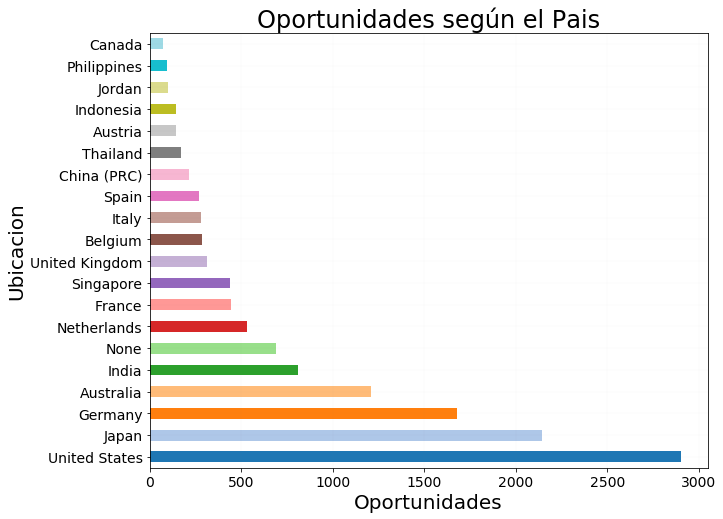

In [288]:
grouped_Territory_top20 = grouped_Territory['total'].nlargest(20)

paired_colors = plt.cm.tab20(range(len(grouped_Territory_top20)))

grouped_Territory_top20.sort_values(ascending=False).plot(kind='barh', rot=0, figsize=(10,8), color=paired_colors, fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.1, alpha=0.3)
plt.title('Oportunidades según el Pais', fontsize=24);
plt.xlabel('Oportunidades', fontsize=20);

plt.ylabel('Ubicacion', fontsize=20);

Se produzco una disminución de los casos None debido a la corrección en la Region de Japon

## Analisis de los None dentro de las Regiones y Territorios

Observando el grafico de Region y de Territorios se observo una alta tasa de territorio sin definir. Al comparar los graficos se observo que Japon se encuentra como Region individual por lo que no coincidia con su ranking de las oportunidades. 

In [270]:


grouped_Region_Terrotory = df_train.groupby(['Region','Territory_unified'])['Region'].count()
grouped_Region_Terrotory = grouped_Region_Terrotory.rename(columns={"Region": "total"})
grouped_Region_Terrotory = grouped_Region_Terrotory.reset_index()
grouped_Region_Terrotory = grouped_Region_Terrotory.rename(columns={0: "total"})
grouped_Region_Terrotory

,Region,Territory_unified,total
0,APAC,Australia,1207
1,APAC,Burma,1
2,APAC,Cambodia,4
3,APAC,China (PRC),218
4,APAC,India,809
5,APAC,Indonesia,145
6,APAC,Malaysia,5
7,APAC,New Zealand,38
8,APAC,Philippines,95
9,APAC,Singapore,441


In [271]:
grouped_Region_Terrotory[grouped_Region_Terrotory.Territory_unified=='None']
grouped_Region_Terrotory[grouped_Region_Terrotory.Territory_unified=='None']

,Region,Territory_unified,total
18,Americas,None,474
51,EMEA,None,185
68,Japan,None,1474
73,Middle East,None,30


Como se menciono más arriba el caso de Japon se puede determinar que ese territorio para los otros casos no se puede determinar su Territorio

In [291]:
df_train[(df_train.Territory_unified=='None') & (df_train.Region == 'Americas')]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified
409,17313,Americas,None,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,2,USD,1051430.63,USD,0.00,Closed Lost,Prod_Category_A_None,None
461,8925,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,1/21/2016,...,2016,NaT,0,USD,187.60,USD,187.60,Closed Won,Prod_Category_A_None,None
577,23006,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,3025.05,USD,0.00,Closed Won,Prod_Category_A_None,None
578,17170,Americas,None,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,18900.00,USD,18900.00,Closed Won,Prod_Category_A_None,None
597,17042,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,56983.50,USD,56983.50,Closed Won,Prod_Category_A_None,None
607,17892,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,14773.50,USD,14773.50,Closed Won,Prod_Category_A_None,None
634,21829,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,26592.30,USD,0.00,Closed Won,Prod_Category_A_None,None
661,27486,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,2016,NaT,0,USD,2884.35,USD,2884.35,Closed Won,Prod_Category_A_None,None
662,27488,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,2017,NaT,0,USD,57400.00,USD,57400.00,Closed Lost,Prod_Category_A_None,None
663,17033,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,12600.00,USD,12600.00,Closed Won,Prod_Category_A_None,None


#Japon se observa como Region independiente por lo tanto se puede reemplazar los valorse none

Tenemos una gran cantidad de propuestas donde el data se no detalla el origen de la propuesta.

In [292]:
import pygal as pg
  
# create a world map 
#worldmap =  pg.maps.World.SupranationalWorld() 
worldmap = pg.maps.world.World()
# set the title of map 
worldmap.title = 'Continents'
  
# adding the continents 
worldmap.add('Africa', [('africa')]) 
worldmap.add('North america', [('north_america')]) 
worldmap.add('Oceania', [('oceania')]) 
worldmap.add('South america', [('south_america')]) 
worldmap.add('Asia', [('asia')]) 
worldmap.add('Europe', [('europe')]) 
worldmap.add('Antartica', [('antartica')]) 
  
# save into the file 
worldmap.render_to_file('abc.svg') 
  
print("Success") 

AttributeError: module 'pygal.maps' has no attribute 'world'

In [293]:
#!pip install pygal
#!pip install pygal_maps_world
